In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [2]:
max_features = 10000  # 作为特征的单词个数
maxlen = 500  # 在这么多单词之后截断文本
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
len(input_train), len(input_test)

(25000, 25000)

In [3]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

input_train.shape, input_test.shape

((25000, 500), (25000, 500))

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 102s 638ms/step - loss: 0.5450 - acc: 0.7164 - val_loss: 0.4368 - val_acc: 0.7986
Epoch 2/10
157/157 [==============================] - 96s 613ms/step - loss: 0.3395 - acc: 0.8601 - val_loss: 0.3918 - val_acc: 0.8484
Epoch 3/10
157/157 [==============================] - 100s 634ms/step - loss: 0.2774 - acc: 0.8919 - val_loss: 0.3393 - val_acc: 0.8670
Epoch 4/10
157/157 [==============================] - 96s 612ms/step - loss: 0.2343 - acc: 0.9121 - val_loss: 0.3693 - val_acc: 0.8394
Epoch 5/10
157/157 [==============================] - 97s 620ms/step - loss: 0.1895 - acc: 0.9301 - val_loss: 0.4207 - val_acc: 0.8372
Epoch 6/10
157/157 [==============================] - 99s 630ms/step - loss: 0.1448 - acc: 0.9472 - val_loss: 0.4155 - val_acc: 0.8440
Epoch 7/10
157/157 [==============================] - 100s 635ms/step - loss: 0.0990 - acc: 0.9675 - val_loss: 0.4078 - val_acc: 0.8648
Epoch 8/10
157/157 [==============================] 

下面和训练和验证的损失值及精度绘制出来

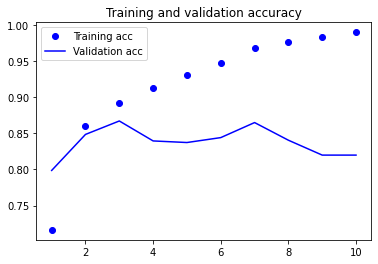

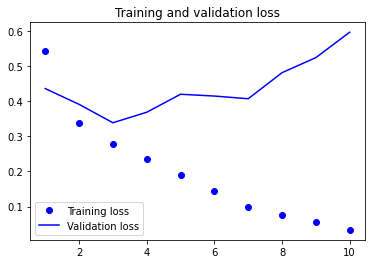

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()